## 알츠하이머 병 진단 예측
### Data Field
    *|PatientID| 환자의 고유 식별자(int)|
     | Age | 환자의 나이 (정수형) |
     | Gender | 환자의 성별 (남성: 0, 여성: 1) |
     | Ethnicity | 환자의 인종 (int, Categorical variable) |
     | EducationLevel | 환자의 교육 수준 (int, Categorical variable) |
     | BMI | 체질량지수 (Body Mass Index, float) |
     | Smoking | 흡연 여부 (비흡연: 0, 흡연: 1) |
     | AlcoholConsumption | 알코올 소비량 (float) |
     | PhysicalActivity | 신체 활동 수준 (float) |
     | DietQuality | 식단의 질 (float) |
     | MemoryComplaints | 기억력 문제 여부 (없음: 0, 있음: 1) |
     | BehavioralProblems | 행동 문제 여부 (없음: 0, 있음: 1) |
     | ADL | 일상생활 활동 수행 능력 (int) |
     | Confusion | 혼란 상태 여부 (0: 없음, 1: 있음) |
     | Disorientation | 방향 감각 상실 여부 (없음: 0, 있음: 1) |
     | PersonalityChanges | 성격 변화 여부 (없음: 0, 있음: 1) |
     | DifficultyCompletingTasks | 작업 수행의 어려움 여부 (없음: 0, 있음: 1) |
     | Forgetfulness | 잊어버림 여부 (없음: 0, 있음: 1) |
     | Diagnosis | 진단 결과 (비알츠하이머: 0, 알츠하이머: 1) |
     | DoctorInCharge | 담당 의사 (int, Categorical variable)|

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('alzheimers_disease_data 2.csv')
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [12]:
print(data.shape)

(2149, 35)


In [14]:
print(data.dtypes)

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [17]:
#문자열 데이터 인코딩
#'DoctorInCharge'이라는 열이 문자열
if 'DoctorInCharge' in data.columns:
    le = LabelEncoder()
    data['DoctorInCharge'] = le.fit_transform(data['DoctorInCharge'])

In [18]:
X = data.drop('Diagnosis', axis = 1)
y = data['Diagnosis']

### 알츠하이머인 사람이 알츠하이머인 사람보다 많은걸 알 수 있다.

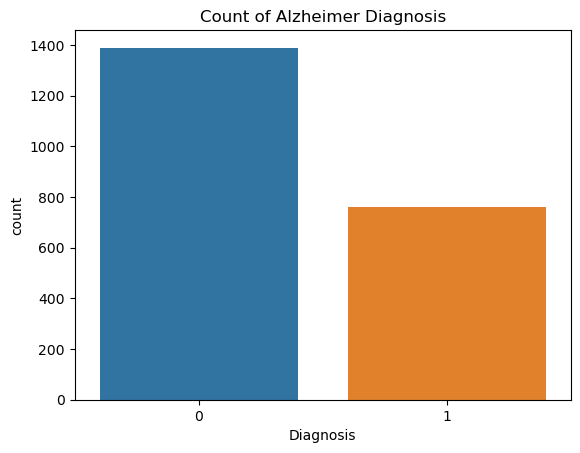

In [19]:
sns.countplot(x = 'Diagnosis', data = data)
plt.title('Count of Alzheimer Diagnosis')
plt.show()

In [20]:
#데이터를 분할하는 과장 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
#하이퍼파라미터  튜닝
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_sa

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [26]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [27]:
#최적의 모델로 예측
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

In [28]:
#최적 모델 결과 평가
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[335   7]
 [ 33 163]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       342
           1       0.96      0.83      0.89       196

    accuracy                           0.93       538
   macro avg       0.93      0.91      0.92       538
weighted avg       0.93      0.93      0.92       538



In [30]:
#교차검증
cv_scores = cross_val_score(best_rf_model, X, y, cv = 5)
print("Cross_validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross_validation scores:  [0.96046512 0.97209302 0.96976744 0.97209302 0.77156177]
Mean cross-validation score:  0.9291960752425868
